In [ ]:
import os

os.chdir('..')

from visualization_tools import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 10)

# MNIST results

MNIST is a simple dataset made by handmade digits in grayscale, 28x28 pixels each:

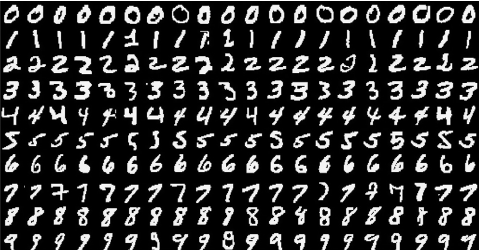


Here we can see that all the models achieve a good level of performance, being STnet and STNet with coordconv layers the fastest

In [ ]:
compare_results('mnist')

Now let's get into the affinity transformation performed by ST-net. We'll pick one of the models trained on MNIST and see how it transforms the images before feeding them into the convolutional network.

In [ ]:
visualize_stn('stnet_mnist_2021-12-05 16:32:55.pt')

We can see that there's no much challenge here, since most of the images are already centered and in the proper position. We can do the same with the ST model that also includes coorconv layers:

In [ ]:
visualize_stn('stcoordconv_mnist_2021-12-05 19:43:41.pt')

Let's take a look into the confusion matrix, that will tell us with what numbers it's having more issues

In [ ]:
visualize_confusion_matrix('stcoordconv_mnist_2021-12-05 19:43:41.pt')

It seems to have more issues with:
* 3s and 5s
* 6s and 1s
* 9s and 7s
* 6s and 4s

Finally let's get into the trickiest examples. We're going to analyze 64 of the test images where the model fails:

In [ ]:
visualize_mistakes('stcoordconv_mnist_2021-12-05 19:43:41.pt')

We can see that some of them are quite tricky, though for many others the model can still be improved

# fashion-MNIST
This dataset shows the same structure than MNIST but now the classes are kinds of clothes. I's a more realistic example than MNIST, which is by far solved by the state of the art

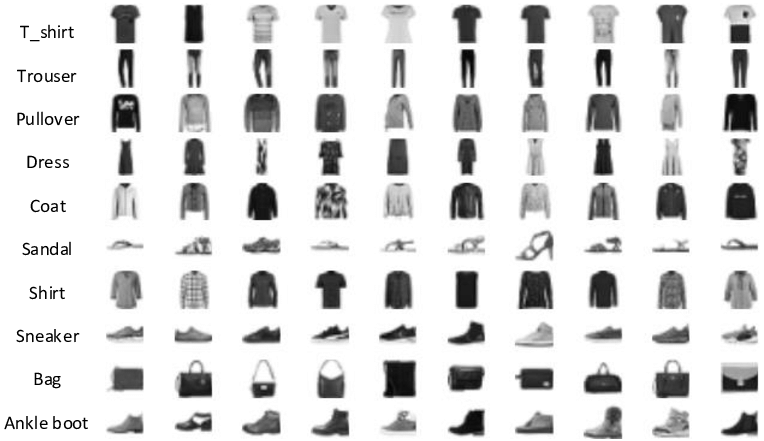

In [ ]:
compare_results('fashion-mnist')

Here the model with both spatial transform and coordconv layers doesn't seem to improve the spatial transform only baseline. We'll extract the same statistics than before.

In [ ]:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
visualize_confusion_matrix('stcoordconv_fashion-mnist_2021-12-05 21:09:21.pt', labels=labels)        

The main challenges seem to be:

* Shirts and T-shirts
* Shirts and coats
* Pullovers and coats

In [ ]:
visualize_mistakes('stcoordconv_fashion-mnist_2021-12-05 21:09:21.pt', labels=labels)

# BIRDS DATASET

In [ ]:
compare_results('birds')